In [2]:
import pandas as pd
import numpy as np
from itertools import chain
import patsy
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import colorcet as cc
%matplotlib inline

In [3]:
factorlabels=pd.read_table("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/core/newcode/figure1/labels_desc.tsv",index_col="factor")

In [4]:
pctvar = pd.read_csv("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/core/newcode/figure1/pctvar_hierpart8.csv").set_index("Unnamed: 0")

In [5]:
catkey = pd.read_table("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/core/newcode/figure1/categorykey_8.tsv")

catkey = dict(zip(catkey.catnum,catkey.catname))

pctvar.index = catkey.values()

In [6]:
pctvar.columns = [x.upper() for x in pctvar.columns]

In [7]:
pctvar_ordered = pctvar.copy()

In [8]:
pctvar_ordered_T = pctvar_ordered.T

In [9]:
pctvar_ordered_T["maxcat"] = pctvar_ordered_T.idxmax(axis=1)

In [10]:
pctvar_ordered_T["maxval"] = [pctvar_ordered_T.loc[x,pctvar_ordered_T.loc[x,"maxcat"]] for x in pctvar_ordered_T.index]

In [11]:
ctdict = pctvar_ordered_T.groupby("maxcat")["maxval"].count().to_dict()

In [12]:
pctvar_ordered_T["catcount"] = pctvar_ordered_T.apply(lambda x: ctdict[x.maxcat],axis=1)

In [13]:
pctvar_ordered_toplot = pctvar_ordered_T.sort_values(["catcount","maxcat","maxval"],ascending=[False,True,False]).drop(["catcount","maxcat","maxval"],axis=1).T

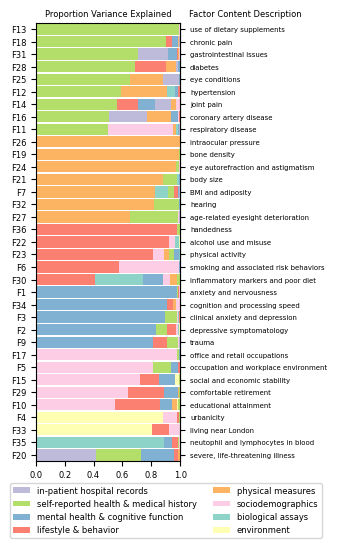

In [37]:
fig, ax1 = plt.subplots(figsize=(3.464,5.58))
mydf=pctvar_ordered_toplot.T.loc[::-1]
x = mydf.index
indexes = np.argsort(mydf.values).T
widths = np.sort(mydf.values).T
order = -1
lefts = widths[::order].cumsum(axis=0)
lefts = np.insert(lefts, 0, np.zeros(len(lefts[0])), axis=0)

mpp_colors = dict(zip(mydf.columns, plt.cm.get_cmap("Set3").colors))
#mpp_colors["self-reported health & medical history"] = plt.cm.get_cmap("Set3").colors[11]

for k, (idxs, vals) in enumerate(list(zip(indexes, widths))[::order]):
    mps = np.take(np.array(mydf.columns), idxs)
    ax1.barh(x, width=vals, height=0.9,left=lefts[k], color=[mpp_colors[m] for m in mps])

ax1.legend((np.take(np.array(mydf.columns), np.argsort(mydf.values)[0]))[::-1], bbox_to_anchor=(0.9, -0.04), loc='upper center', ncol=2, fontsize=6)
ax1.set_xlim([0,1])
ax1.set_ylim([-0.5,34.5])
ax1.tick_params(axis='both', which='major', labelsize=6)
axR = ax1.secondary_yaxis('right')
axR.set_yticks(range(35))
axR.set_yticklabels(factorlabels.loc[[x.lower() for x in pctvar_ordered_toplot.columns],"label"].values[::-1], fontsize=5)
plt.xlabel("Proportion Variance Explained",fontsize=6)
ax1.xaxis.set_label_coords(x=0.5,y=1.03)
#plt.title("Factor Structure and Contents",fontsize=16,x=0.85, y=1.03,fontweight="bold")
ax1.text(1.06,35,"Factor Content Description",fontsize=6)
fig.tight_layout()
plt.savefig("/stanley/robinson/ccarey/factor_paper_revision/figures_RKWchecklist/Figure1_journal_RKW.pdf",format="pdf") # bbox_inches="tight",